# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from typing import List

# My useful function

In [2]:
# Random n distinct number in range [start, end)
def distinct_random(start:int , end: int, n: int) -> List[int]:
    a = np.arange(start, end, dtype=int)
    np.random.shuffle(a)
    return a[:n]
# Euclidian Distance
def euclid_distance(x: np.array, y: np.array) -> float:
    return np.sqrt(np.dot(x-y, x-y))

# Clustering

In [3]:
# Define dataframe
df = pd.DataFrame()
df['x'] = [1, 3, 2, 8, 6, 7, -3, -2, -7]
df['y'] = [2, 3, 2, 8, 6, 7, -3, -4, -7]

[]

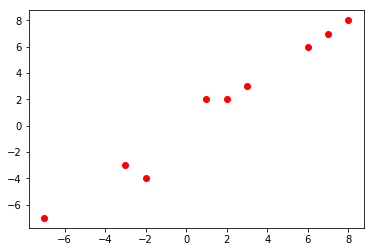

In [4]:
# Plotting Data
plt.scatter(df['x'], df['y'], color='red')
plt.plot()

In [5]:
# K Means Implementation
def train_kmean(df: pd.DataFrame, k: int, start_points=None):
    if not start_points or len(start_points) != k:
        start_points = distinct_random(0, df.shape[0], k)
    
    # Numpy array of data
    data = df.values
    
    # Getting centroid of data
    centroids = [data[i] for i in start_points[:]]
    print('initial centroid:', centroids)
    
    should_iterate = True
    while should_iterate:
        cluster = [[] for i in range(k)]
        # Assign point to cluster
        for point in data:
            min_index = np.argmin(list(map(lambda x: euclid_distance(point, x), centroids)))
            cluster[min_index].append(point)
        # calculate new centroid from mean
        new_centroids = [np.array(c).mean(axis=0) for c in cluster]
        print('cluster:', cluster)
        print('new centroid:', new_centroids)
        print()
        should_iterate = False
        for i in range(k):
            if (not np.array_equal(centroids[i], new_centroids[i])):
                should_iterate = True
        centroids = new_centroids
    cost = 0
    result = np.array(list(map(lambda x: np.array(x), cluster)))
    for i in range(k):
        cost += np.sum(np.sum((result[i] - centroids[i])**2, axis=1)) / data.shape[0]
    print("Cost: ", cost)
    return result

## T4

initial centroid: [array([3, 3]), array([2, 2]), array([-3, -3])]
cluster: [[array([3, 3]), array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([6., 6.]), array([1.5, 2. ]), array([-4.        , -4.66666667])]

cluster: [[array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([3, 3]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([7., 7.]), array([2.        , 2.33333333]), array([-4.        , -4.66666667])]

cluster: [[array([8, 8]), array([6, 6]), array([7, 7])], [array([1, 2]), array([3, 3]), array([2, 2])], [array([-3, -3]), array([-2, -4]), array([-7, -7])]]
new centroid: [array([7., 7.]), array([2.        , 2.33333333]), array([-4.        , -4.66666667])]

Cost:  3.2592592592592586
[[[ 8  8]
  [ 6  6]
  [ 7  7]]

 [[ 1  2]
  [ 3  3]
  [ 2  2]]

 [[-3 -3]
  [-2 -4]
  [-7 -7]]]


[]

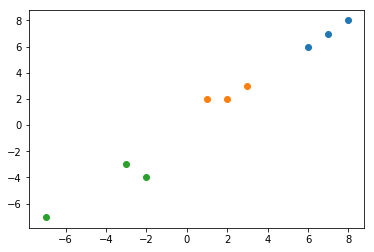

In [6]:
result = train_kmean(df, 3, [1, 2, 6])
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()

## T5

initial centroid: [array([-3, -3]), array([2, 2]), array([-7, -7])]
cluster: [[array([-3, -3]), array([-2, -4])], [array([1, 2]), array([3, 3]), array([2, 2]), array([8, 8]), array([6, 6]), array([7, 7])], [array([-7, -7])]]
new centroid: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]

cluster: [[array([-3, -3]), array([-2, -4])], [array([1, 2]), array([3, 3]), array([2, 2]), array([8, 8]), array([6, 6]), array([7, 7])], [array([-7, -7])]]
new centroid: [array([-2.5, -3.5]), array([4.5       , 4.66666667]), array([-7., -7.])]

Cost:  8.648148148148147
[array([[-3, -3],
       [-2, -4]])
 array([[1, 2],
       [3, 3],
       [2, 2],
       [8, 8],
       [6, 6],
       [7, 7]])
 array([[-7, -7]])]


[]

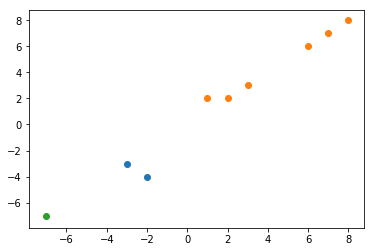

In [7]:
result = train_kmean(df, 3, [6, 2, 8])
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()

initial centroid: [array([6, 6]), array([3, 3]), array([-7, -7]), array([7, 7]), array([-2, -4]), array([2, 2])]
cluster: [[array([6, 6])], [array([3, 3])], [array([-7, -7])], [array([8, 8]), array([7, 7])], [array([-3, -3]), array([-2, -4])], [array([1, 2]), array([2, 2])]]
new centroid: [array([6., 6.]), array([3., 3.]), array([-7., -7.]), array([7.5, 7.5]), array([-2.5, -3.5]), array([1.5, 2. ])]

cluster: [[array([6, 6])], [array([3, 3])], [array([-7, -7])], [array([8, 8]), array([7, 7])], [array([-3, -3]), array([-2, -4])], [array([1, 2]), array([2, 2])]]
new centroid: [array([6., 6.]), array([3., 3.]), array([-7., -7.]), array([7.5, 7.5]), array([-2.5, -3.5]), array([1.5, 2. ])]

Cost:  0.2777777777777778
[array([[6, 6]]) array([[3, 3]]) array([[-7, -7]])
 array([[8, 8],
       [7, 7]]) array([[-3, -3],
       [-2, -4]])
 array([[1, 2],
       [2, 2]])]


[]

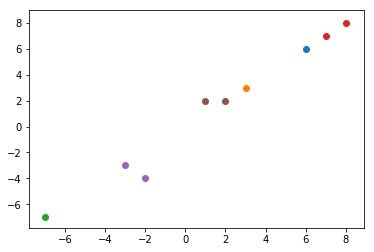

In [8]:
result = train_kmean(df, 6)
print(result)
# Plotting result
for cluster in result:
    plt.scatter(cluster[:,0], cluster[:,1])
plt.plot()

In [9]:
# K Means Implementation
def train_kmean_iterate(df: pd.DataFrame, k: int, iteration=50):
    # Numpy array of data
    data = df.values
    answer_cost = np.inf
    answer_centroids = []
    answer_result = []
    
    for i in tqdm(range(iteration)):
        # Random Start point
        start_points = distinct_random(0, df.shape[0], k)
        # Getting centroid of data
        centroids = [data[i] for i in start_points[:]]
        #print('initial centroid:', centroids)

        should_iterate = True
        while should_iterate:
            cluster = [[] for i in range(k)]
            # Assign point to cluster
            for point in data:
                min_index = np.argmin(list(map(lambda x: euclid_distance(point, x), centroids)))
                cluster[min_index].append(point)
            # calculate new centroid from mean
            new_centroids = [np.array(c).mean(axis=0) for c in cluster]
            should_iterate = False
            for i in range(k):
                if (not np.array_equal(centroids[i], new_centroids[i])):
                    should_iterate = True
            centroids = new_centroids
        empty_cluster = False
        for c in cluster:
            if not c:
                empty_cluster = True
        if empty_cluster:
            break
        cost = 0
        result = np.array(list(map(lambda x: np.array(x), cluster)))
        for i in range(k):
            cost += np.sum(np.sum((result[i] - centroids[i])**2, axis=1)) / data.shape[0]
        if answer_cost > cost:
            answer_cost = cost
            answer_centroids = centroids
            answer_result = result
    M = data.sum(axis=0) / data.shape[0]
    between_clus_var = 0
    for i in range(k):
        between_clus_var += answer_result[i].shape[0] * ((answer_centroids[i] - M)**2).sum() / (data.shape[0] - 1)
    all_data_var = ((data - M)**2).sum(axis=1).sum(axis=0) / (data.shape[0] - 1)
    print('between clus var:', between_clus_var)
    print('all data var', all_data_var)
    return between_clus_var / all_data_var

 78%|███████▊  | 39/50 [00:00<00:00, 387.81it/s]

between clus var: 0.0
all data var 52.277777777777786
k = 1 and frac var = 0.0
between clus var: 39.84027777777778
all data var 52.277777777777786
k = 2 and frac var = 0.762088204038257


 88%|████████▊ | 44/50 [00:00<00:00, 439.19it/s]

between clus var: 48.611111111111114
all data var 52.277777777777786
k = 3 and frac var = 0.9298618490967056
between clus var: 51.31944444444444
all data var 52.277777777777786
k = 4 and frac var = 0.9816684378320933


100%|██████████| 50/50 [00:00<00:00, 421.37it/s]

between clus var: 51.69444444444444
all data var 52.277777777777786
k = 5 and frac var = 0.9888416578108393


[]

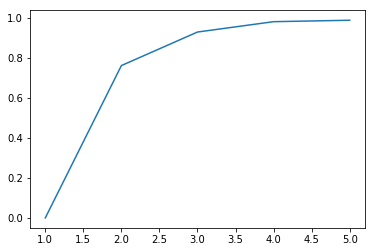

In [10]:
x = []
y = []
for k in range(1, 6):
    x.append(k)
    y.append(train_kmean_iterate(df, k, 50))
    print(f"k = {k} and frac var = {y[-1]}")
plt.plot(np.array(x), np.array(y))
plt.plot()